In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pickle

pickle_in = open('/content/drive/MyDrive/ML_Results/Preprocessing/X_ANN_Img_Pre.pickle','rb')
X = np.array(pickle.load(pickle_in))
pickle_in.close()

pickle_in = open('/content/drive/MyDrive/ML_Results/Preprocessing/Y_ANN_Img_Pre.pickle','rb')
Y = np.array(pickle.load(pickle_in))
pickle_in.close()

print("Number of images in dataset: " ,len(X))

X_train, X_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.8, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=0)

image_size = X_train.shape[1]
input_size = image_size
print("Number of features in image: ", input_size)

X_train=np.reshape(X_train, [-1,input_size])
X_train=X_train.astype('float32')/255

X_test=np.reshape(X_test, [-1,input_size])
X_test=X_test.astype('float32')/255

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/ML_Results_Main/ANN_Img_weights.h5", verbose=1, save_best_only=True)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 256,activation='relu'))
ann.add(tf.keras.layers.Dense(units = 128,activation='relu'))
ann.add(tf.keras.layers.Dense(units = 1,activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

history = ann.fit(X_train, y_train, epochs = 50, validation_data=(X_valid, y_valid), callbacks=[checkpoint])

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

loss,acc = ann.evaluate(X_test,y_test)

print()
print("Loss: ", loss)
print("Accuracy: ", acc)

Number of images in dataset:  12540
Number of features in image:  14400
Epoch 1/50
313/314 [============================>.] - ETA: 0s - loss: 0.1564 - accuracy: 0.7876
Epoch 00001: val_loss improved from inf to 0.22652, saving model to /content/drive/MyDrive/ML_Results_Main/ANN_Img_weights.h5
314/314 [==============================] - 9s 28ms/step - loss: 0.1564 - accuracy: 0.7877 - val_loss: 0.2265 - val_accuracy: 0.7719
Epoch 2/50
312/314 [============================>.] - ETA: 0s - loss: 0.1310 - accuracy: 0.8233
Epoch 00002: val_loss did not improve from 0.22652
314/314 [==============================] - 8s 27ms/step - loss: 0.1309 - accuracy: 0.8235 - val_loss: 0.2275 - val_accuracy: 0.7719
Epoch 3/50
314/314 [==============================] - ETA: 0s - loss: 0.0974 - accuracy: 0.8725
Epoch 00003: val_loss improved from 0.22652 to 0.22033, saving model to /content/drive/MyDrive/ML_Results_Main/ANN_Img_weights.h5
314/314 [==============================] - 9s 28ms/step - loss: 0.097

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

In [5]:
print("Classification report for classifier %s:\n%s\n" % (
    ann, classification_report(y_test, y_pred)))


Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f8aef687790>:
              precision    recall  f1-score   support

           0       0.76      0.55      0.64       413
           1       0.81      0.92      0.86       841

    accuracy                           0.80      1254
   macro avg       0.78      0.73      0.75      1254
weighted avg       0.79      0.80      0.79      1254




In [6]:
################# Confusion matrix
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(cm)

################ Accuracy
print()
print("Model accuracy: ", accuracy_score(y_test, y_pred))

Confusion matrix
[[227 186]
 [ 71 770]]

Model accuracy:  0.7950558213716108


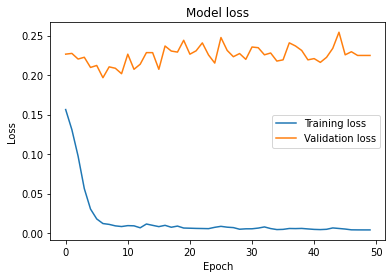

In [7]:
################### Loss Curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='center right')
plt.show()

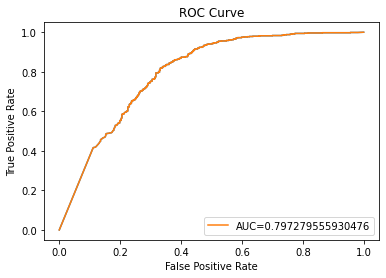

In [8]:
################## ROC Curve
y_pred = ann.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [9]:
##################### To predict from outside image
import cv2
def ANN_img_preprocessing(img):
  image = cv2.imread(img)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  resized_gray = cv2.resize(gray, (120,120))
  edged_gray = cv2.Canny(resized_gray, 100, 200)
  edged_gray = np.array(edged_gray).flatten()
  return edged_gray

fileimg = ANN_img_preprocessing("/content/drive/MyDrive/C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data/64.bmp")

fileimg = np.reshape(fileimg, [-1,input_size])
fileimg = fileimg.astype('float32')/255

y_pred = ann.predict(fileimg)
y_pred = (y_pred > 0.5)
print("Prediction result: ", y_pred)


Prediction result:  [[ True]]


In [11]:
fileName = "/content/drive/MyDrive/ML_Results_Main/ANN_Img_79.5.model"
pickle.dump(ann, open(fileName, 'wb'))

INFO:tensorflow:Assets written to: ram://af68eb81-accc-47dd-bdb1-3ee1980d20e7/assets
